In [ ]:
# from google.colab import files
# Files = files.upload()

In [ ]:
import pandas as pd
Data = pd.read_excel('/content/50_Startups.xlsx')

In [ ]:
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
Data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
Data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
Data = Data.drop_duplicates()

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [ ]:
Data=pd.get_dummies(Data, columns=['State'])

In [ ]:
Data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
Data.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
Profit              float64
State_California      uint8
State_Florida         uint8
State_New York        uint8
dtype: object

In [ ]:
Data['State_California'] = Data['State_California'].astype(str).astype(int)
Data['State_Florida'] = Data['State_Florida'].astype(str).astype(int)
Data['State_New York'] = Data['State_New York'].astype(str).astype(int)


In [ ]:
Data.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
Profit              float64
State_California      int64
State_Florida         int64
State_New York        int64
dtype: object

In [ ]:
Data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
import numpy as np
Q1= np.percentile(Data['Profit'], 25, interpolation = 'midpoint')
Q3= np.percentile(Data['Profit'], 75, interpolation = 'midpoint')

IQR = Q3-Q1
UpperLimit = Q3 + 1.5*IQR
LowerLimit = Q1 - 1.5*IQR

<ipython-input-15-bad6b49a1364>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(Data['Profit'], 25, interpolation = 'midpoint')
<ipython-input-15-bad6b49a1364>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3= np.percentile(Data['Profit'], 75, interpolation = 'midpoint')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

R&D Spend              Axes(0.125,0.653529;0.168478x0.226471)
Administration      Axes(0.327174,0.653529;0.168478x0.226471)
Marketing Spend     Axes(0.529348,0.653529;0.168478x0.226471)
Profit              Axes(0.731522,0.653529;0.168478x0.226471)
State_California       Axes(0.125,0.381765;0.168478x0.226471)
State_Florida       Axes(0.327174,0.381765;0.168478x0.226471)
State_New York      Axes(0.529348,0.381765;0.168478x0.226471)
dtype: object

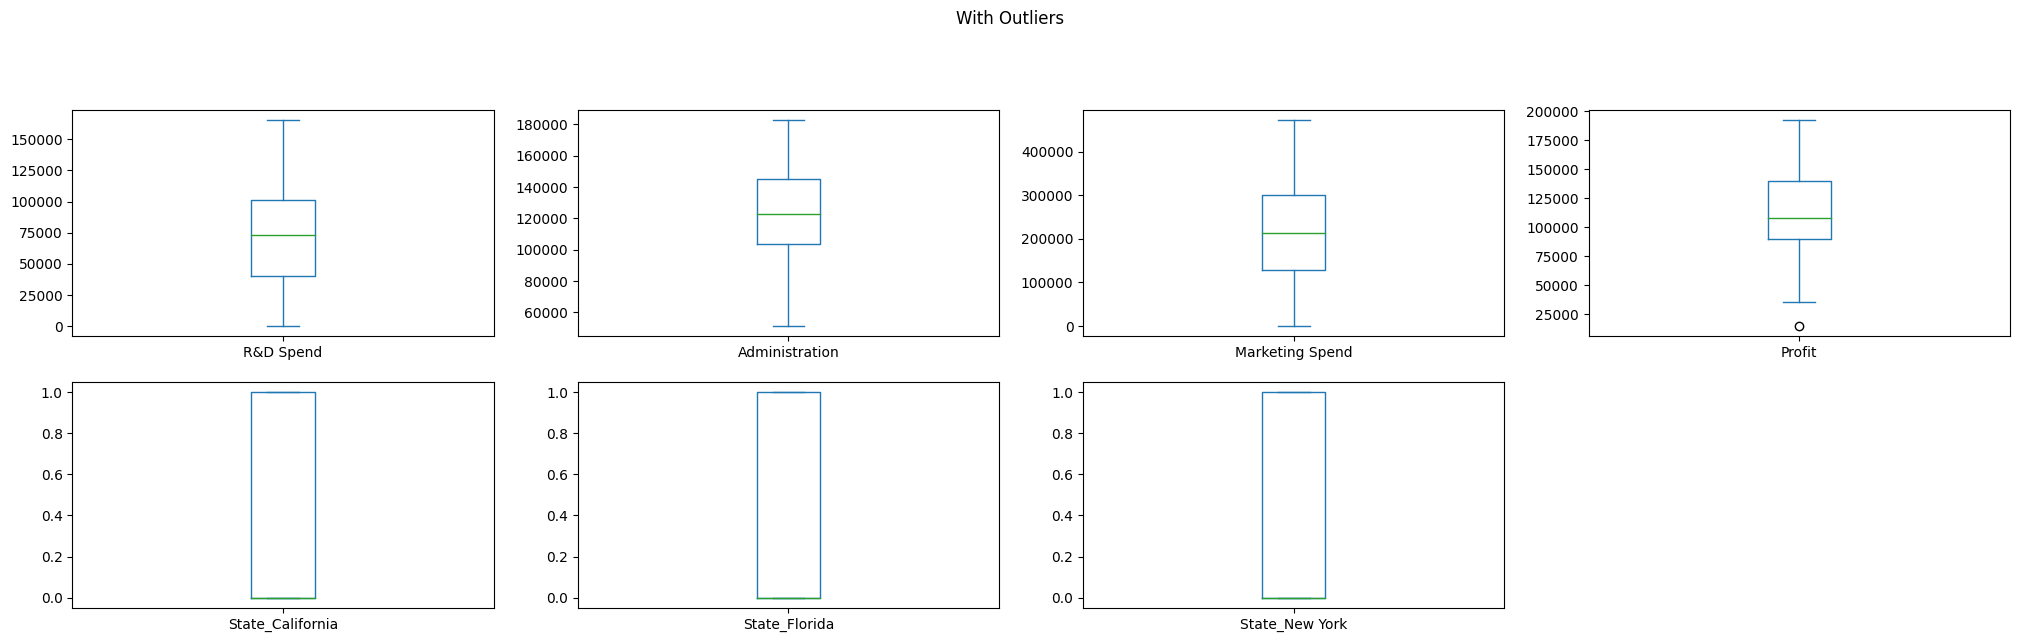

In [ ]:
Data.plot(kind='box', subplots = True , figsize = (25,10) , layout = (3,4), title='With Outliers')

In [ ]:
OutlierList = []
for i in range(Data['Profit'].shape[0]):
    if Data['Profit'][i] >= UpperLimit:
        OutlierList.append(i)
    elif Data['Profit'][i] <= LowerLimit:
        OutlierList.append(i)

OutlierList

[49]

In [ ]:
Data = Data.drop(labels=OutlierList, axis=0)

R&D Spend              Axes(0.125,0.653529;0.168478x0.226471)
Administration      Axes(0.327174,0.653529;0.168478x0.226471)
Marketing Spend     Axes(0.529348,0.653529;0.168478x0.226471)
Profit              Axes(0.731522,0.653529;0.168478x0.226471)
State_California       Axes(0.125,0.381765;0.168478x0.226471)
State_Florida       Axes(0.327174,0.381765;0.168478x0.226471)
State_New York      Axes(0.529348,0.381765;0.168478x0.226471)
dtype: object

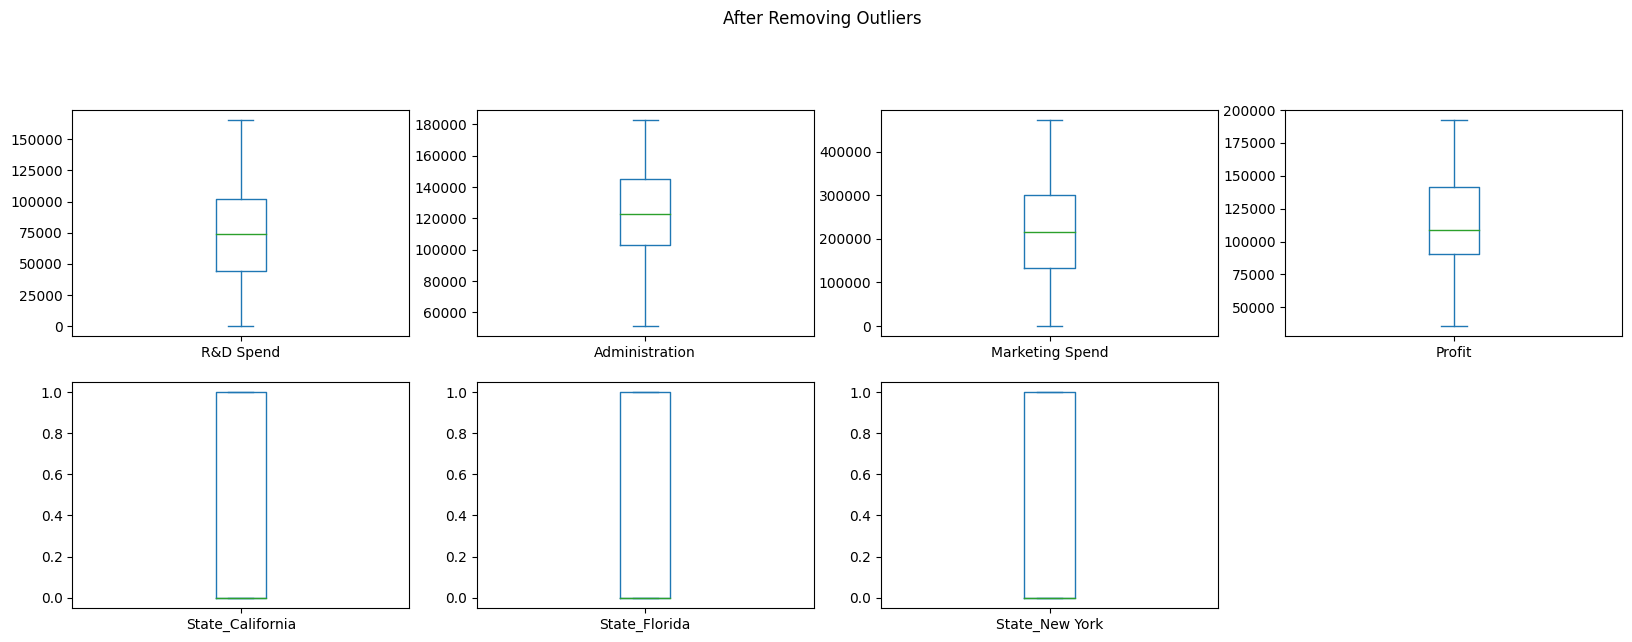

In [ ]:
Data.plot(kind='box', subplots = True , figsize = (20,10) , layout = (3,4), title='After Removing Outliers')


In [ ]:
Data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [ ]:
X = Data[['R&D Spend', 'Administration', 'Marketing Spend',
       'State_California', 'State_Florida', 'State_New York']]
Y = Data['Profit']

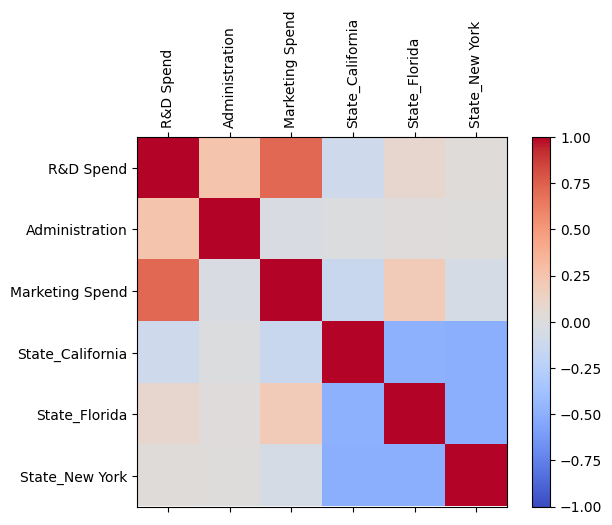

In [ ]:
corr  = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

In [ ]:
from statsmodels.formula.api import ols
MLR= ols("Y~X", Data).fit()
# Print the summary
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.51e-29
Time:                        14:30:04   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.0

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
import statsmodels.api as sm
MLR_1=sm.OLS(Y_train,X_train).fit()
print (MLR_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     176.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           7.91e-23
Time:                        14:30:04   Log-Likelihood:                -402.41
No. Observations:                  39   AIC:                             816.8
Df Residuals:                      33   BIC:                             826.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7619      0.043  

In [ ]:
Y_pred=MLR_1.predict(X_test)

In [ ]:
Y_pred

13    129503.403513
45     47438.272493
47     49311.838930
44     67056.984898
17    129710.457195
27    115605.637151
26    110076.902610
25    104036.368678
31     96287.833540
19    112013.227199
dtype: float64

In [ ]:
Residual=Y_test-Y_pred

In [ ]:
Residual

13     4803.946487
45    17487.807507
47    -6752.108930
44    -1856.654898
17    -4340.087195
27   -10597.327151
26    -4343.362610
25     3367.971322
31     1195.726460
19    10763.632801
dtype: float64

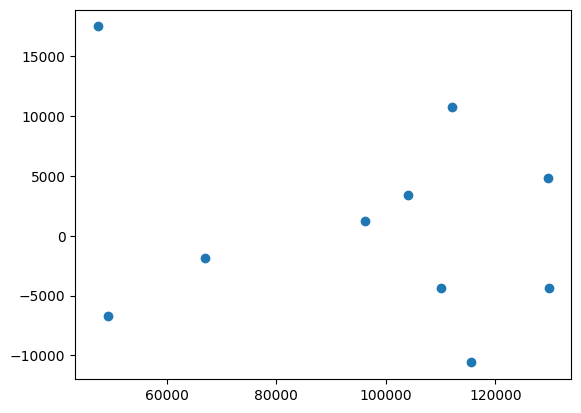

In [ ]:
plt.scatter(Y_pred,Residual)

(array([1., 1., 2., 1., 2., 1., 0., 1., 0., 1.]),
 array([-10597.32715077,  -7788.81368502,  -4980.30021928,  -2171.78675353,
           636.72671221,   3445.24017796,   6253.7536437 ,   9062.26710945,
         11870.7805752 ,  14679.29404094,  17487.80750669]),
 <BarContainer object of 10 artists>)

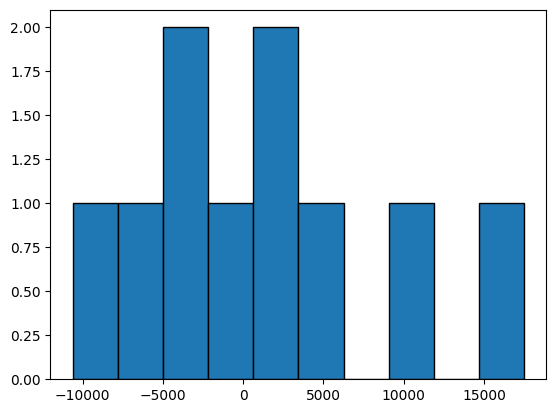

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Residual, edgecolor='black', bins=10)

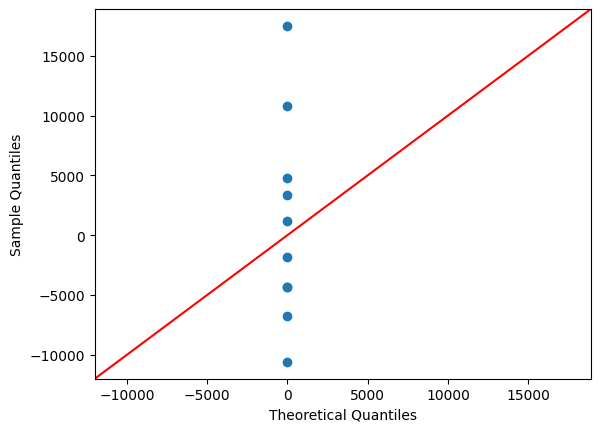

In [ ]:
import pylab as py
data_points = np.random.normal(0, 1, 100)

sm.qqplot(Residual, line ='45')
py.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred_1 = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred_1)

print("Mean Squared Error:", mse)

Mean Squared Error: 65657273.76526791


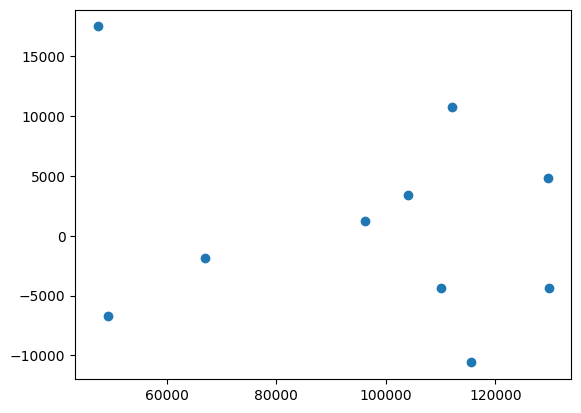

In [ ]:
plt.scatter(Y_pred_1,Residual)

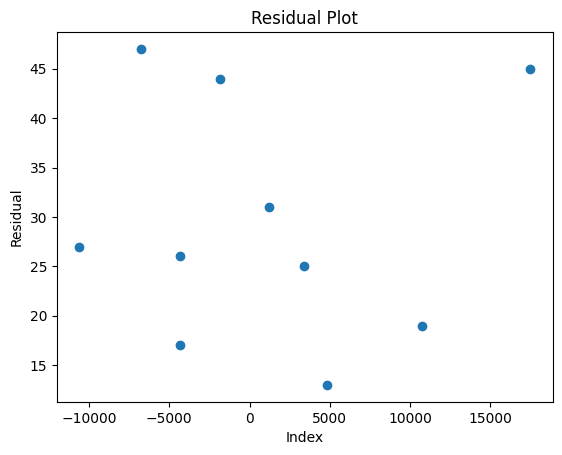

In [ ]:
plt.scatter(Residual,Residual.index)
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF= X

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i)
                          for i in range(len(X_VIF.columns))]
print(vif_data)

            feature       VIF
0         R&D Spend  2.400821
1    Administration  1.177936
2   Marketing Spend  2.324983
3  State_California  8.647650
4     State_Florida  9.472045
5    State_New York  9.247467


In [ ]:
X1 = Data[['R&D Spend', 'Marketing Spend',
       'State_California', 'State_Florida', 'State_New York']]
Y1 = Data['Profit']